In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import matplotlib
matplotlib.rc('axes', unicode_minus=False)

In [3]:
train_df = pd.read_csv("./data/train.csv")
print(train_df.shape)
train_df.head()

(2952, 15)


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


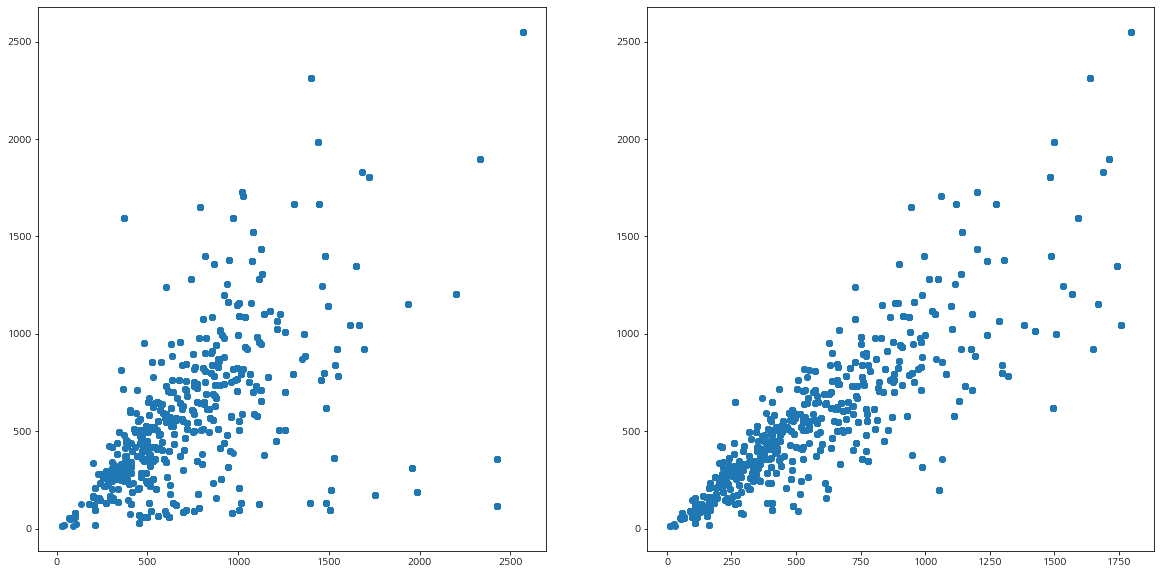

In [5]:
fig = plt.figure(figsize=(20,10))
ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)

ax_1.scatter(train_df["총세대수"].values, train_df["등록차량수"].values)
ax_2.scatter(train_df["단지내주차면수"].values, train_df["등록차량수"].values)

plt.show()

세대수 보다는 단지내주차면수와 강하게 비례하는 양상을 보임  
위 점을 이용해서 조정 값으로써 예상을 해보는게 낫나...

In [6]:
train_df["suff_rate"] = train_df["등록차량수"] / train_df["단지내주차면수"]

print(train_df["suff_rate"].describe())

count    2952.000000
mean        0.923733
std         0.333951
min         0.115854
25%         0.690419
50%         0.931429
75%         1.139806
max         2.458333
Name: suff_rate, dtype: float64
